# **Major Project (Sentiment Analysis)**

The method of determining whether a block of text is good, negative, or neutral is known as sentiment analysis. Sentiment analysis is the contextual mining of words that reveals the social sentiment of a brand and aids businesses in determining if the product they are producing will find a market. Sentiment analysis's objective is to examine public sentiment in a way that will support corporate growth. It emphasises emotions as well as polarity (positive, negative, and neutral) (happy, sad, angry, etc.).For both customers and service providers, sentiment analysis is essential. Customers and service providers are interested in how the general public perceives a certain brand, product, location, etc. in the current internet- and globalization-driven era. Customers also gain from it since it helps them choose the best product, which is advantageous for both the service provider and the client since it has a business component.

## ***Importing the Modules***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

## ***Data Reading***

In [ ]:
from google.colab import drive # mounting the drive to colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import Restaurant Reviews Dataset
df=pd.read_table("/content/drive/MyDrive/verzo python/Major project/Restaurant_Reviews.tsv")

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


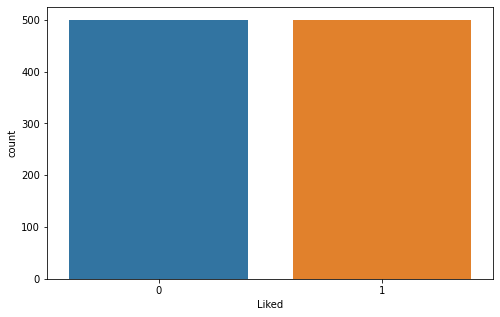

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [ ]:
x=df['Review'].values# defining X and Y
y=df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split# spliting into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_train.shape

(750,)

In [ ]:
y_test.shape

(250,)

### ***Count vectorisation and SVM Models***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer# Import countVectorizer
vect=CountVectorizer(stop_words='english')

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC# Import Support Vector Classifier
modelS=SVC()

In [ ]:
modelS.fit(x_train_vect,y_train)# train the model

SVC()

In [ ]:
y_predS=modelS.predict(x_test_vect) #predicting the test result
y_predS

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
acc1= accuracy_score(y_predS,y_test) #evaluating the model
acc1

0.72

### ***Using Pipeline(CountVectorizer + SVC)***

In [ ]:
from sklearn.pipeline import make_pipeline
modelSC=make_pipeline(CountVectorizer(),SVC())

In [ ]:
modelSC.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
y_predSC=modelSC.predict(x_test)

In [ ]:
acc2= accuracy_score(y_predSC,y_test)
acc2

0.792

### ***Naive Bayes model***

In [ ]:
from sklearn.naive_bayes import MultinomialNB #Import Naive Bayes Classifier
modelN= MultinomialNB()

In [ ]:
modelN.fit(x_train_vect,y_train)# train the model

MultinomialNB()

In [ ]:
y_predN=modelN.predict(x_test_vect) #predicting the test result
y_predN

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
acc3= accuracy_score(y_predN,y_test) #evaluating the model
acc3

0.744

### ***Using Pipeline(CountVectorizer + NB)***

In [ ]:
from sklearn.pipeline import make_pipeline
modelNC=make_pipeline(CountVectorizer(),MultinomialNB())

In [ ]:
modelNC.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_predNC=modelNC.predict(x_test)
y_predNC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
acc4= accuracy_score(y_predNC,y_test)
acc4

0.784

In [ ]:
accuracy= (acc1, acc2, acc3, acc4)
accuracy

(0.72, 0.792, 0.744, 0.784)

In [ ]:
modelNC.predict(["Crust is good."])

array([1])

## ***Importing Joblib***

In [ ]:
import joblib
joblib.dump(modelSC,'Sentiment Analysis')

['Sentiment Analysis']

In [ ]:
final_model =joblib.load('Sentiment Analysis')
final_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
import joblib
final_model.predict(["crust is good."])

array([1])

## **Web App Creation**

In [ ]:
pip install streamlit --quiet

In [ ]:
%%writefile app.py

import streamlit as st
import joblib

st.title("Sentiment Analysis")

final_model =joblib.load('Sentiment Analysis')
input1= st.text_input("enter the review: ")

output1= final_model.predict([input1])
op= ['Negaitive','Postive']

if st.button("PREDICT"):
  st.title(op[output1[0]])

Overwriting app.py


In [ ]:
#run the web app
!streamlit run app.py & npx localtunnel --port 8501

2022-08-01 13:13:01.756 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 4.323s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.199.207:8501

your url is: http://lazy-days-tickle-35-245-199-207.loca.lt
  Stopping...
^C
